In [1]:
# Import necessary modules
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

here = os.path.dirname(os.path.abspath("__file__"))
project_root = os.path.abspath(os.path.join(here, '../../'))
sys.path.insert(0, project_root)

from core.ga.ga_member import Member
from core.ga.ga_params import GeneticAlgorithmParams

from core.model.model_carrying_capacities import ModelCarryingCapacities
from core.model.model_disturbances import ModelDisturbances
from core.model.model_growth_rates import ModelGrowthRates
from core.model.model_initial_conditions import ModelInitialConditions
from core.model.model_params import ModelParams
from core.model.model_typical_disturbances import ModelTypicalDisturbances

## Analysis across runs

In [2]:
ga_parallel_results_folder = "ga_parallel_results"
values_costs_folder        = "unique_values_costs_results"
input_disturbances_csv     = "io/inputs/hourly_prcp_rad_temp_iowa.csv"

## Revenue analysis

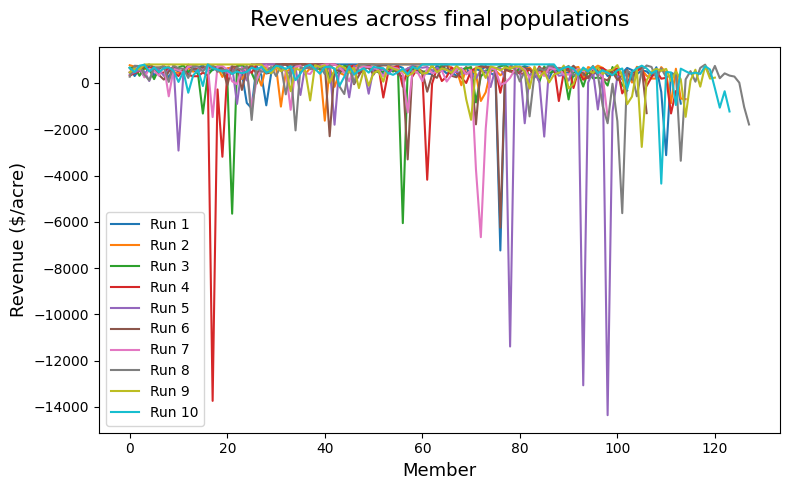

In [3]:
fig, ax = plt.subplots(figsize=(8, 5))

for i in range(1, 11): # Runs 1 to 10

    values_costs_path = os.path.join(
        ga_parallel_results_folder,
        values_costs_folder,
        f"ga_parallel_result_unique_values_and_costs_{i}.csv"
    )

    with open(values_costs_path, "rb") as f:
        unique_values_costs = np.loadtxt(f, delimiter=",", skiprows=1)
        unique_costs = unique_values_costs[:, -2]  # The second to last column is the cost
        unique_revenues = unique_values_costs[:, -1]  # The last column is the revenue

    member_ids = np.arange(unique_revenues.shape[0])
    ax.plot(member_ids, unique_revenues[::-1], label=f"Run {i}")

ax.set_title("Revenues across final populations", fontsize=16, pad=15)
ax.set_xlabel("Member", fontsize=13)
ax.set_ylabel("Revenue ($/acre)", fontsize=13)
ax.legend()

fig.tight_layout()

## Growth analysis - Best in the final populations

In [4]:
# Set up Member attributes common to all runs
ga_params = GeneticAlgorithmParams()
carrying_capacities = ModelCarryingCapacities()
disturbances = ModelDisturbances.from_defaults(path=os.path.join(project_root, input_disturbances_csv))
growth_rates = ModelGrowthRates()
model_params = ModelParams()
initial_conditions = ModelInitialConditions(
    h0=carrying_capacities.kh/model_params.simulation_hours, # m/hr
    A0=carrying_capacities.kA/model_params.simulation_hours, # m2/hr
    N0=carrying_capacities.kN/model_params.simulation_hours, # number/hr
    c0=carrying_capacities.kc/model_params.simulation_hours, # number/hr
    P0=carrying_capacities.kP/model_params.simulation_hours  # kg/hr
)
typical_disturbances = ModelTypicalDisturbances()

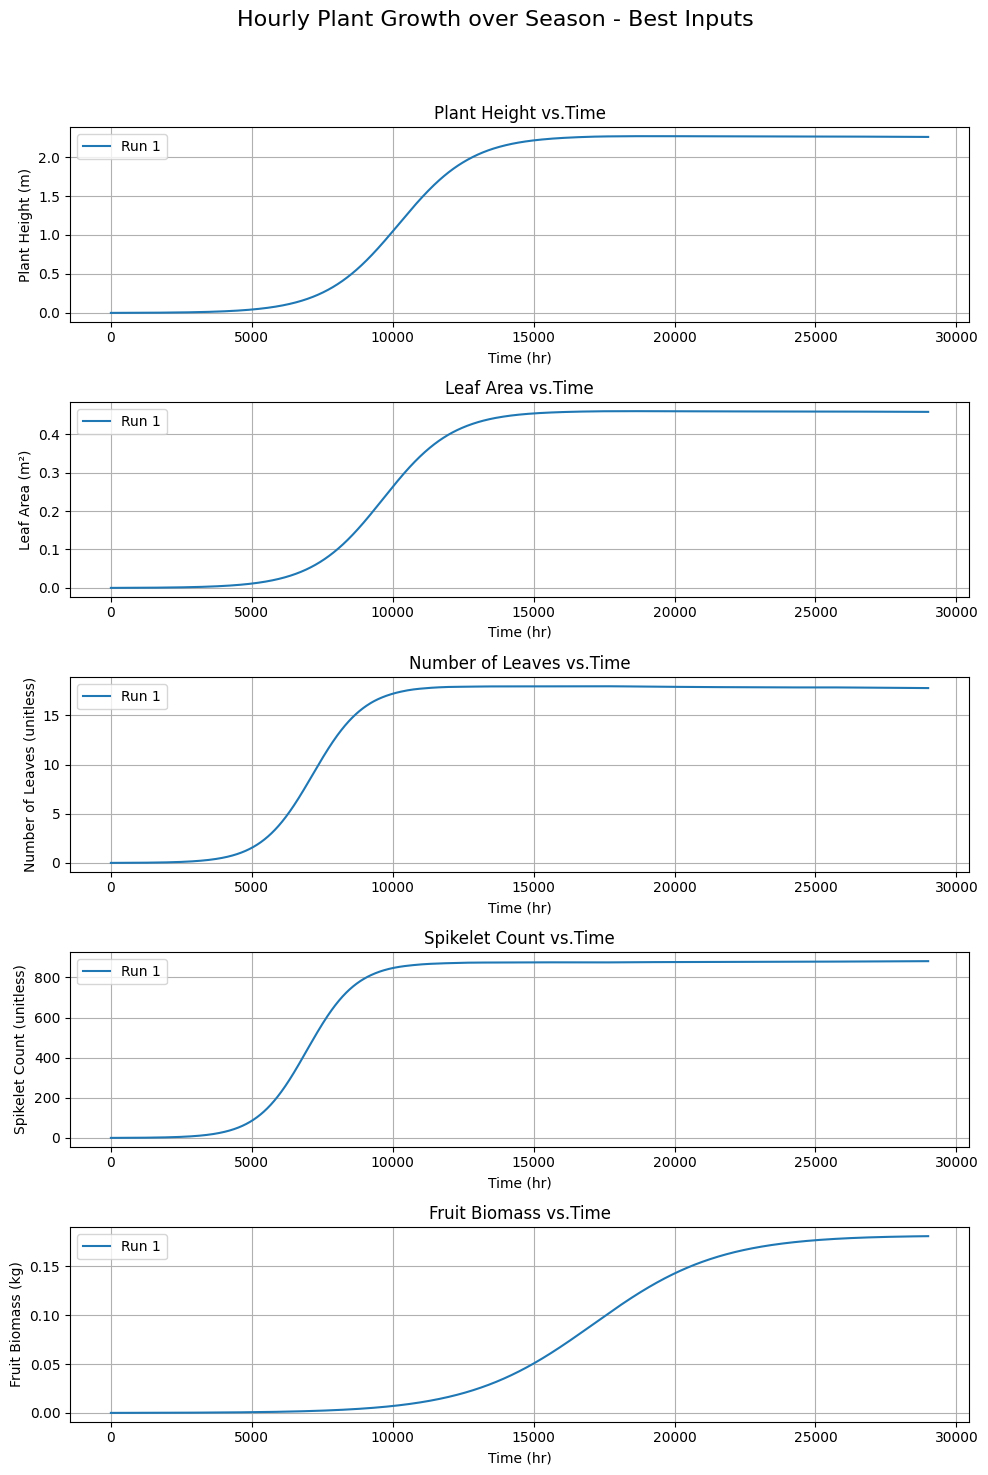

In [5]:
# Initialize the figure for plant growth analysis
fig, axs = plt.subplots(5, 1, figsize=(10, 15))

# Loop over all 10 of the best runs to analyze plant growth
for i in range(1, 2): # Runs 1 to 10

    # Load the best member's input values from the corresponding CSV file
    values_costs_path = os.path.join(
        ga_parallel_results_folder,
        values_costs_folder,
        f"ga_parallel_result_unique_values_and_costs_{i}.csv"
    )
    with open(values_costs_path, "rb") as f:
        unique_values_costs = np.loadtxt(f, delimiter=",", skiprows=1)

    best_index = np.argmax(unique_values_costs[:, -1])  # The last column is the revenue
    irrigation_frequency, irrigation_amount, fertilizer_frequency, fertilizer_amount = unique_values_costs[best_index, 0:4]
    member = Member(
        ga_params            = ga_params,
        carrying_capacities  = carrying_capacities,
        disturbances         = disturbances,
        growth_rates         = growth_rates,
        initial_conditions   = initial_conditions,
        model_params         = model_params,
        typical_disturbances = typical_disturbances,
        values = np.array([irrigation_frequency, irrigation_amount, fertilizer_frequency, fertilizer_amount])
    )
    h, A, N, c, P, _, _, _, _, _, _, _, _, _, _, _, _, _, _ = member.get_closed_form_cost_verbose()

    time = np.arange(len(h))
    axs[0].plot(time, h, label=f'Run {i}')
    axs[1].plot(time, A, label=f'Run {i}')
    axs[2].plot(time, N, label=f'Run {i}')
    axs[3].plot(time, c, label=f'Run {i}')
    axs[4].plot(time, P, label=f'Run {i}')

# Plant Height
axs[0].set_xlabel('Time (hr)')
axs[0].set_ylabel('Plant Height (m)')
axs[0].set_title(f'Plant Height vs.Time')
axs[0].legend()
axs[0].grid(True)

# Leaf Area
axs[1].set_xlabel('Time (hr)')
axs[1].set_ylabel('Leaf Area (m²)')
axs[1].set_title(f'Leaf Area vs.Time')
axs[1].legend()
axs[1].grid(True)

# Number of Leaves
axs[2].set_xlabel('Time (hr)')
axs[2].set_ylabel('Number of Leaves (unitless)')
axs[2].set_title(f'Number of Leaves vs.Time')
axs[2].legend()
axs[2].grid(True)

# Spikelet Count
axs[3].set_xlabel('Time (hr)')
axs[3].set_ylabel('Spikelet Count (unitless)')
axs[3].set_title(f'Spikelet Count vs.Time')
axs[3].legend()
axs[3].grid(True)

# Fruit Biomass
axs[4].set_xlabel('Time (hr)')
axs[4].set_ylabel('Fruit Biomass (kg)')
axs[4].set_title(f'Fruit Biomass vs.Time')
axs[4].legend()
axs[4].grid(True)

fig.suptitle(f'Hourly Plant Growth over Season - Best Inputs', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Growth analysis - Worst in the final populations

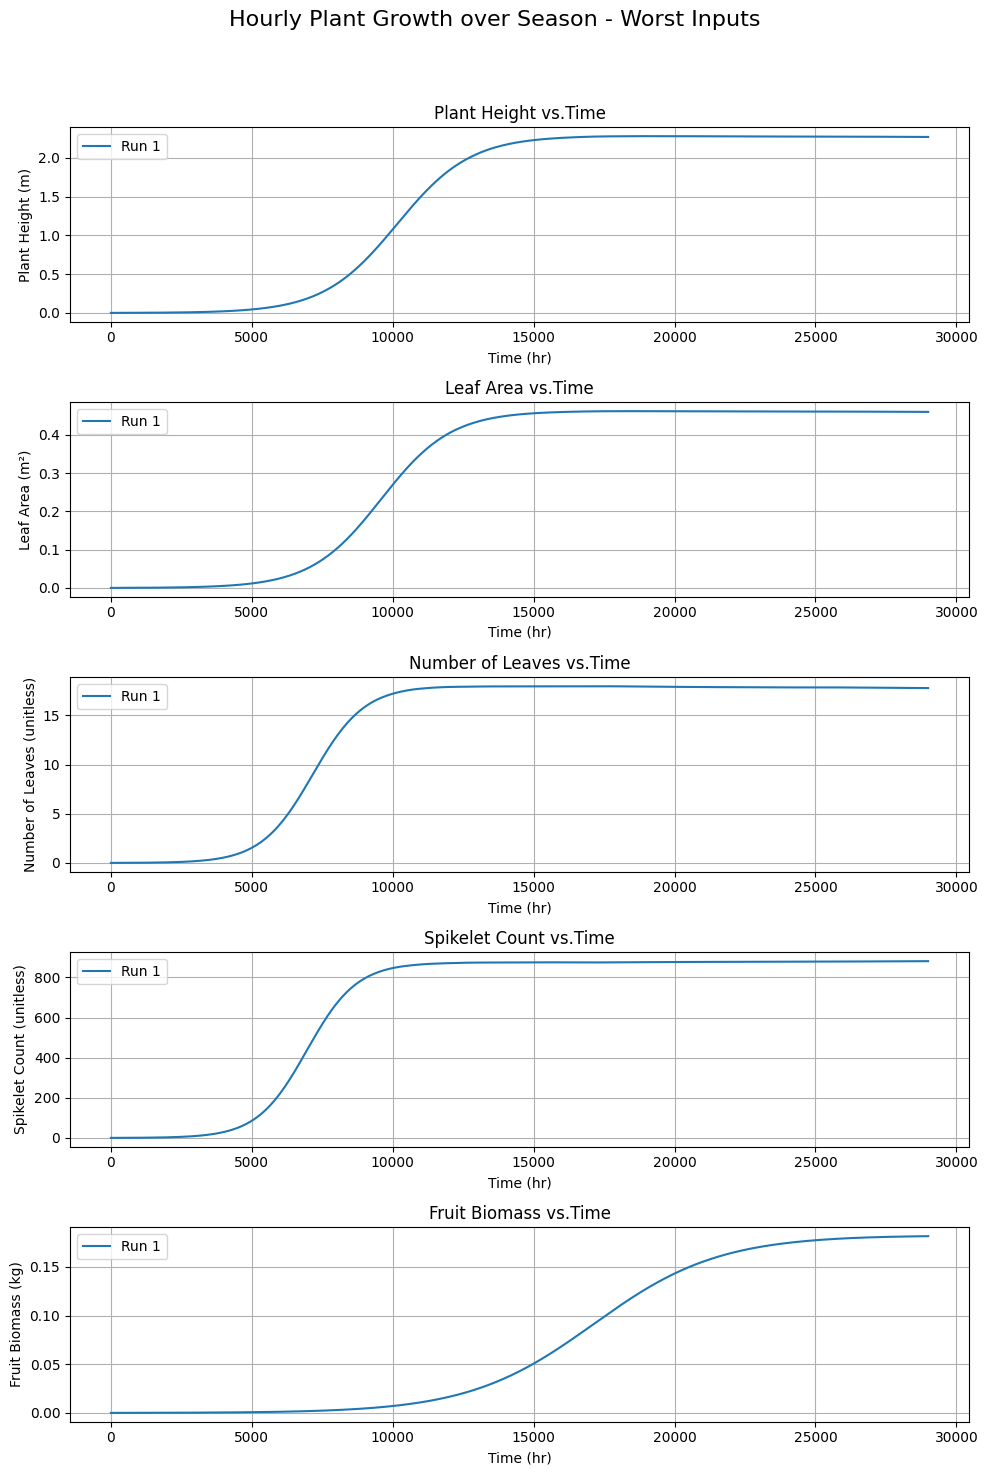

In [6]:
# Initialize the figure for plant growth analysis
fig, axs = plt.subplots(5, 1, figsize=(10, 15))

# Loop over all 10 of the best runs to analyze plant growth
for i in range(1, 2): # Runs 1 to 10

    # Load the best member's input values from the corresponding CSV file
    values_costs_path = os.path.join(
        ga_parallel_results_folder,
        values_costs_folder,
        f"ga_parallel_result_unique_values_and_costs_{i}.csv"
    )
    with open(values_costs_path, "rb") as f:
        unique_values_costs = np.loadtxt(f, delimiter=",", skiprows=1)

    worst_index = np.argmin(unique_values_costs[:, -1])  # The last column is the revenue
    irrigation_frequency, irrigation_amount, fertilizer_frequency, fertilizer_amount = unique_values_costs[worst_index, 0:4]
    member = Member(
        ga_params            = ga_params,
        carrying_capacities  = carrying_capacities,
        disturbances         = disturbances,
        growth_rates         = growth_rates,
        initial_conditions   = initial_conditions,
        model_params         = model_params,
        typical_disturbances = typical_disturbances,
        values = np.array([irrigation_frequency, irrigation_amount, fertilizer_frequency, fertilizer_amount])
    )
    h, A, N, c, P, _, _, _, _, _, _, _, _, _, _, _, _, _, _ = member.get_closed_form_cost_verbose()

    time = np.arange(len(h))
    axs[0].plot(time, h, label=f'Run {i}')
    axs[1].plot(time, A, label=f'Run {i}')
    axs[2].plot(time, N, label=f'Run {i}')
    axs[3].plot(time, c, label=f'Run {i}')
    axs[4].plot(time, P, label=f'Run {i}')

# Plant Height
axs[0].set_xlabel('Time (hr)')
axs[0].set_ylabel('Plant Height (m)')
axs[0].set_title(f'Plant Height vs.Time')
axs[0].legend()
axs[0].grid(True)

# Leaf Area
axs[1].set_xlabel('Time (hr)')
axs[1].set_ylabel('Leaf Area (m²)')
axs[1].set_title(f'Leaf Area vs.Time')
axs[1].legend()
axs[1].grid(True)

# Number of Leaves
axs[2].set_xlabel('Time (hr)')
axs[2].set_ylabel('Number of Leaves (unitless)')
axs[2].set_title(f'Number of Leaves vs.Time')
axs[2].legend()
axs[2].grid(True)

# Spikelet Count
axs[3].set_xlabel('Time (hr)')
axs[3].set_ylabel('Spikelet Count (unitless)')
axs[3].set_title(f'Spikelet Count vs.Time')
axs[3].legend()
axs[3].grid(True)

# Fruit Biomass
axs[4].set_xlabel('Time (hr)')
axs[4].set_ylabel('Fruit Biomass (kg)')
axs[4].set_title(f'Fruit Biomass vs.Time')
axs[4].legend()
axs[4].grid(True)

fig.suptitle(f'Hourly Plant Growth over Season - Worst Inputs', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()